### APPLICATION OF VADER SENTIMENT ANALYZER  TO NEWS DATASET

In [130]:
import pandas as pd
import matplotlib.pyplot as plt #plot the sentiment on a chart
import nltk 
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer #perform sentiment analysis 
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Giulia\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [238]:
data=pd.read_csv('TUTTE_NEWS.csv', sep=";", index_col=False)

In [239]:
pd.set_option('display.max_colwidth',None)
data

,date,headline
0,01/01/2020,"2020 Predictions: No Rate Cuts, No Recession, Sell Apple, Buy Energy"
1,01/01/2020,3 Reasons Why Growth Investors Shouldn't Overlook Fair Isaac (FICO)
2,01/01/2020,3 Tech Giants That Could Benefit From The 5G Revolution In 2020
3,01/01/2020,ACA or CBPX: Which Is the Better Value Stock Right Now?
4,01/01/2020,All You Need to Know About Alexion (ALXN) Rating Upgrade to Strong Buy
...,...,...
73569,28/08/2020,"Weyland Tech assumes the name of its subsidiary, Logiq, emerges strong for its customer data"
73570,28/08/2020,"Whipsaw action in gold resolves to the upside, with $2K again in sight"
73571,28/08/2020,White House interviewing replacements for FTC head - Politico
73572,28/08/2020,Workhorse drops on reported HorseFly drone flaws - Barron's


In [240]:
vader = SentimentIntensityAnalyzer() 

#compound: The normalized compound score which calculates the sum of all lexicon ratings and takes values from -1 to 1

# Iterate through the headlines and get the polarity scores using vader
f = lambda title: vader.polarity_scores(title)['compound']
data['compound'] = data['headline'].apply(f)

data

,date,headline,compound
0,01/01/2020,"2020 Predictions: No Rate Cuts, No Recession, Sell Apple, Buy Energy",-0.7430
1,01/01/2020,3 Reasons Why Growth Investors Shouldn't Overlook Fair Isaac (FICO),0.1625
2,01/01/2020,3 Tech Giants That Could Benefit From The 5G Revolution In 2020,0.4588
3,01/01/2020,ACA or CBPX: Which Is the Better Value Stock Right Now?,0.6486
4,01/01/2020,All You Need to Know About Alexion (ALXN) Rating Upgrade to Strong Buy,0.5106
...,...,...,...
73569,28/08/2020,"Weyland Tech assumes the name of its subsidiary, Logiq, emerges strong for its customer data",0.5106
73570,28/08/2020,"Whipsaw action in gold resolves to the upside, with $2K again in sight",0.1779
73571,28/08/2020,White House interviewing replacements for FTC head - Politico,0.0000
73572,28/08/2020,Workhorse drops on reported HorseFly drone flaws - Barron's,0.0000


In [241]:
data['date'] = pd.to_datetime(data['date'])
data

,date,headline,compound
0,2020-01-01,"2020 Predictions: No Rate Cuts, No Recession, Sell Apple, Buy Energy",-0.7430
1,2020-01-01,3 Reasons Why Growth Investors Shouldn't Overlook Fair Isaac (FICO),0.1625
2,2020-01-01,3 Tech Giants That Could Benefit From The 5G Revolution In 2020,0.4588
3,2020-01-01,ACA or CBPX: Which Is the Better Value Stock Right Now?,0.6486
4,2020-01-01,All You Need to Know About Alexion (ALXN) Rating Upgrade to Strong Buy,0.5106
...,...,...,...
73569,2020-08-28,"Weyland Tech assumes the name of its subsidiary, Logiq, emerges strong for its customer data",0.5106
73570,2020-08-28,"Whipsaw action in gold resolves to the upside, with $2K again in sight",0.1779
73571,2020-08-28,White House interviewing replacements for FTC head - Politico,0.0000
73572,2020-08-28,Workhorse drops on reported HorseFly drone flaws - Barron's,0.0000


In [245]:
data.date.dt.month #OK, I HAVE DATA TILL AUGUST

0        1
1        1
2        1
3        1
4        1
        ..
73569    8
73570    8
73571    8
73572    8
73573    8
Name: date, Length: 73574, dtype: int64

COMPUTE AVG OF COMPOUND SCORE FOR EACH DAY

In [170]:
mean_df = data.groupby("date").mean()

In [168]:
mean_df

,compound
date,
2020-01-01,0.168709
2020-01-02,0.132627
2020-01-03,0.107134
2020-01-04,0.012900
2020-01-05,-0.014406
...,...
2020-08-24,0.048212
2020-08-25,0.061023
2020-08-26,0.062438


In [171]:
mean_df.rename(columns = {'compound':'vader_score'}, inplace = True)
mean_df

,vader_score
date,
2020-01-01,0.168709
2020-01-02,0.132627
2020-01-03,0.107134
2020-01-04,0.012900
2020-01-05,-0.014406
...,...
2020-08-24,0.048212
2020-08-25,0.061023
2020-08-26,0.062438


In [173]:
mean_df.to_csv('sentiment_index/news_vader_score.csv')

COUNT NUMBER OF NEWS PER EACH DAY

In [216]:
n_news = data.groupby("date")['headline'].count()
n_news

date
2020-01-01     57
2020-01-02    131
2020-01-03    196
2020-01-04     26
2020-01-05     34
             ... 
2020-08-24    284
2020-08-25    329
2020-08-26    276
2020-08-27    314
2020-08-28    176
Name: headline, Length: 241, dtype: int64

Text(0.5, 1.0, 'NUMBER OF NEWS FOR EACH DAY')

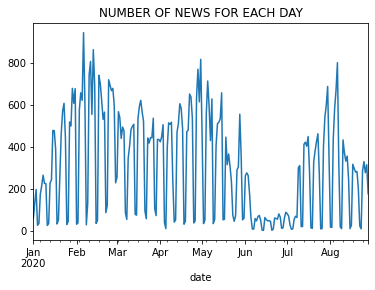

In [278]:
n_news.plot()
plt.title("NUMBER OF NEWS FOR EACH DAY")

COUNT NUMBER OF NEWS PER EACH MONTH

In [276]:
n_news.index.month #DATA TILL AUGUST

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            8, 8, 8, 8, 8, 8, 8, 8, 8, 8],
           dtype='int64', name='date', length=241)

Text(0.5, 1.0, 'NUMBER OF NEWS FOR EACH MONTH')

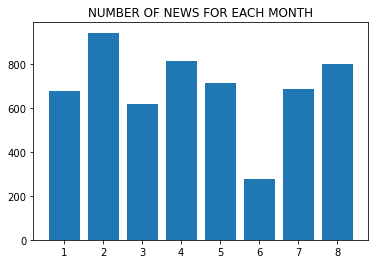

In [274]:
plt.bar(n_news.index.month,n_news)
plt.title("NUMBER OF NEWS FOR EACH MONTH")

PLOT THE VADER SENTIMENT SCORES FOR NEWS DATASET

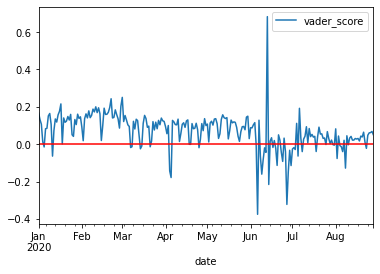

In [280]:
mean_df.plot()
plt.axhline(0, color='red')

In [272]:
d2=mean_df.groupby(mean_df.index.month).mean() #avg of each month
d2

,vader_score
date,
1,0.110054
2,0.152155
3,0.094190
4,0.068626
5,0.097794
6,-0.017497
7,0.031538
8,0.020772


<AxesSubplot:xlabel='date'>

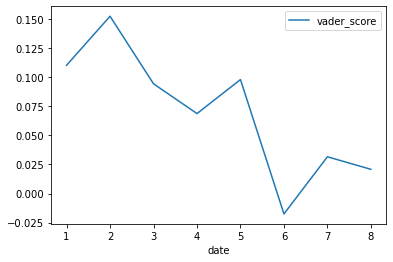

In [273]:
d2.plot() #NEED TO INVESTIGATE WHAT HAPPENED IN JUNE.. PROBABLY BECAUSE THERE ARE ONLY FEW NEWS

CREATION OF VADER LABELS (POSITIVE, NEUTRAL, NEGATIVE) WITH A COMPOUND TRESHOLD OF [ -0.025, +0.025 ]

In [232]:
def format_output(output_dict):
  
    polarity = "neutral"

    if output_dict['compound']>= 0.025:
        polarity = "positive"

    elif output_dict['compound']<= -0.025:
        polarity = "negative"

    return polarity

def predict_sentiment(text):
  
    output_dict =  vader.polarity_scores(text)
    return format_output(output_dict)

# Run the predictions
data["vader_prediction"] = data["headline"].apply(predict_sentiment)

data.rename(columns = {'compound':'vader_score'}, inplace = True)
data.rename(columns = {'vader_prediction':'vader_label'}, inplace = True)

# Show 5 random rows of the data
data.sample(5)

,date,headline,vader_score,vader_label
69492,2020-08-11,"Berkshire Hathaway may buy PPL's U.K. electric utility unit, Seaport says in upgrade",0.0000,neutral
13511,2020-02-11,First Foundation Advisors Buys Salesforce. ...,0.0000,neutral
65503,2020-07-30,Komatsu reports Q1 results,0.0000,neutral
3620,2020-01-20,Is Novartis AG (NVS) A Suitable Pick for Value Investors?,0.3400,positive
35742,2020-04-03,Consumer Products Industry Outlook: Prospects Look Favorable,0.6486,positive


In [233]:
data

,date,headline,vader_score,vader_label
0,2020-01-01,"2020 Predictions: No Rate Cuts, No Recession, Sell Apple, Buy Energy",-0.7430,negative
1,2020-01-01,3 Reasons Why Growth Investors Shouldn't Overlook Fair Isaac (FICO),0.1625,positive
2,2020-01-01,3 Tech Giants That Could Benefit From The 5G Revolution In 2020,0.4588,positive
3,2020-01-01,ACA or CBPX: Which Is the Better Value Stock Right Now?,0.6486,positive
4,2020-01-01,All You Need to Know About Alexion (ALXN) Rating Upgrade to Strong Buy,0.5106,positive
...,...,...,...,...
73569,2020-08-28,"Weyland Tech assumes the name of its subsidiary, Logiq, emerges strong for its customer data",0.5106,positive
73570,2020-08-28,"Whipsaw action in gold resolves to the upside, with $2K again in sight",0.1779,positive
73571,2020-08-28,White House interviewing replacements for FTC head - Politico,0.0000,neutral
73572,2020-08-28,Workhorse drops on reported HorseFly drone flaws - Barron's,0.0000,neutral


In [234]:
data['vader_label'].value_counts()

neutral     32886
positive    29223
negative    11465
Name: vader_label, dtype: int64

In [235]:
data['vader_label'].value_counts(normalize=True) #MUCH BETTER RESULTS THAN WITH PREVIOUS (NOT CLEANED) DATA

neutral     0.446979
positive    0.397192
negative    0.155830
Name: vader_label, dtype: float64

In [63]:
data

,date,headline,finbert_score,finbert_label,vader_score,vader_label
0,2020-06-01,Agilent Technologies Announces Pricing of $5…… Million of Senior Notes,0.999977,neutral,0.0000,neutral
1,2020-05-18,Agilent (A) Gears Up for Q2 Earnings: What's in the Cards?,0.999296,neutral,0.0000,neutral
2,2020-05-15,J.P. Morgan Asset Management Announces Liquidation of Six Exchange-Traded Funds,0.999535,neutral,0.3612,positive
3,2020-05-15,"Pershing Square Capital Management, L.P. Buys Agilent Technologies Inc, The Howard Hughes Corp, ...",0.999965,neutral,0.0000,neutral
4,2020-05-12,Agilent Awards Trilogy Sciences with a Golden Ticket at LabCentral,0.971711,positive,0.4588,positive
...,...,...,...,...,...,...
110426,2020-07-09,ChemoCentryx files U.S. avacopan application for blood vessel inflammation,0.999981,neutral,0.0000,neutral
110427,2020-07-09,KLA downgraded as valuation limits upside potential,0.999952,negative,0.0000,neutral
110428,2020-07-09,ChromaDex reports promising anti-viral effects of Niagen in coronavirus cell model,0.992494,positive,0.4019,positive
110429,2020-07-09,Sandvik acquires remaining stake in Allied Construction,0.999046,neutral,0.0000,neutral


In [236]:
data.to_csv('sentiment_analysis_results/news_vader_senti_after_cl.csv', index=False, encoding='utf-8-sig')